**Logistic Regression Model for Obesity Classification Based on Weight Data**

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("bmi_dataset.csv")
df.head()

,Weight,Obese
0,45.521410,0
1,46.244087,1
2,47.357189,0
3,47.766521,0
4,48.058136,0


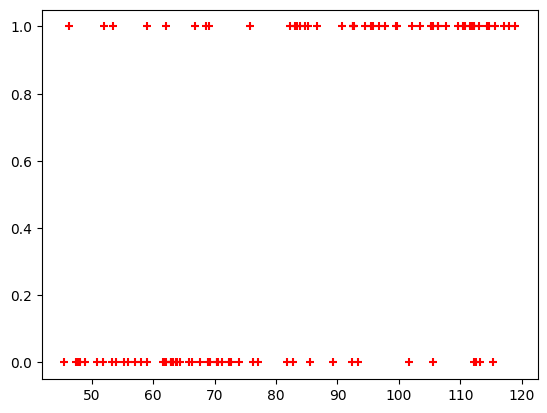

In [9]:
plt.scatter(df.Weight,df.Obese,marker='+',color='red')

In [10]:
import random
# Features and target
X = df[["Weight"]].values
Y = df[["Obese"]].values

unique_indices = []
while len(unique_indices) < 100:
    idx = random.randint(0, len(df) - 1)   # random index
    if idx not in unique_indices:          # avoid duplicates
        unique_indices.append(idx)

print(unique_indices)

[57, 49, 46, 61, 35, 77, 31, 48, 38, 0, 78, 90, 63, 68, 93, 80, 75, 4, 86, 22, 27, 41, 7, 81, 34, 19, 28, 59, 65, 18, 76, 14, 11, 52, 56, 55, 12, 62, 74, 44, 72, 89, 99, 60, 84, 95, 24, 30, 25, 88, 92, 26, 5, 58, 32, 96, 29, 16, 20, 91, 51, 39, 2, 42, 23, 73, 9, 67, 45, 13, 53, 87, 54, 15, 83, 10, 98, 36, 82, 70, 33, 66, 6, 43, 40, 37, 79, 94, 71, 50, 3, 17, 97, 21, 85, 47, 64, 69, 1, 8]


In [11]:
# First 90 for training
train_idx = unique_indices[:90]
test_idx = unique_indices[90:]

# Create train/test splits
X_train = np.array([X[i] for i in train_idx])
Y_train = np.array([Y[i] for i in train_idx])

X_test = np.array([X[i] for i in test_idx])
Y_test = np.array([Y[i] for i in test_idx])



print("X_train length:", len(X_train))
print("Y_train length:", len(Y_train))
print("X_test length:", len(X_test))
print("Y_test length:", len(Y_test))
print(X_test)

X_train length: 90
Y_train length: 90
X_test length: 10
Y_test length: 10
[[ 47.76652105]
 [ 58.99275442]
 [117.1835471 ]
 [ 62.15986241]
 [111.5314818 ]
 [ 81.70895702]
 [ 92.73078084]
 [ 96.82033036]
 [ 46.24408717]
 [ 51.98270759]]


In [12]:
Y_train = Y_train.ravel()
Y_test  = Y_test.ravel()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

print(X_test)

[[ 47.76652105]
 [ 58.99275442]
 [117.1835471 ]
 [ 62.15986241]
 [111.5314818 ]
 [ 81.70895702]
 [ 92.73078084]
 [ 96.82033036]
 [ 46.24408717]
 [ 51.98270759]]


In [13]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
print(X_test)

[[ 47.76652105]
 [ 58.99275442]
 [117.1835471 ]
 [ 62.15986241]
 [111.5314818 ]
 [ 81.70895702]
 [ 92.73078084]
 [ 96.82033036]
 [ 46.24408717]
 [ 51.98270759]]


In [15]:
y_predicted = model.predict(X_test)

In [16]:
model.predict_proba(X_test)

array([[0.90734735, 0.09265265],
       [0.82777455, 0.17222545],
       [0.10723523, 0.89276477],
       [0.79724201, 0.20275799],
       [0.14666973, 0.85333027],
       [0.53239288, 0.46760712],
       [0.36146328, 0.63853672],
       [0.30400637, 0.69599363],
       [0.91514888, 0.08485112],
       [0.88229719, 0.11770281]])

In [17]:
model.score(X_test,Y_test)

0.8

In [18]:
y_predicted

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [19]:
model.coef_

array([[0.06339894]])

In [20]:
model.intercept_

array([-5.31001479])

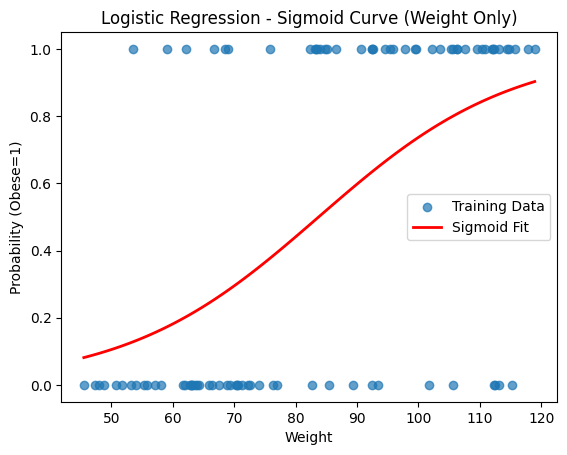

In [21]:
x_vals = X_train[:, 0]
x_sorted = np.linspace(min(x_vals), max(x_vals), 100)

# Extract model parameters
w = model.coef_[0][0]
b = model.intercept_[0]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_sigmoid = sigmoid(w * x_sorted + b)

# Plot
plt.scatter(x_vals, Y_train, label="Training Data", alpha=0.7)
plt.plot(x_sorted, y_sigmoid, color="red", label="Sigmoid Fit", linewidth=2)
plt.xlabel("Weight")
plt.ylabel("Probability (Obese=1)")
plt.title("Logistic Regression - Sigmoid Curve (Weight Only)")
plt.legend()
plt.show()